In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data = [
    ["Avon", "Farmington Valley Academy Montessori", "Private", "Source of business", "PK–K–8", None, 91, "4:1", 20500],
    ["Avon", "Talcott Mountain Academy", "Private", "Source of business", "K–8", None, 57, "4:1", 28400],
    ["Avon", "Avon Middle School", "Public", "Source of business", "7–8", 73.5, 461, "12:1", None],
    ["Bloomfield", "Carmen Arace Intermediate School", "Public", "Source of business", "5–6", 59.4, 210, "11:1", None],
    ["Bloomfield", "Carmen Arace Middle School", "Public", "Source of business", "7–8", 62.9, 202, "8:1", None],
    ["Bloomfield", "CREC Ana Grace Academy of the Arts", "Public", "Source of business", "PK–8", 47.7, 856, "12:1", None],
    ["Bloomfield", "CREC Academy of International Studies", "Public", "Source of business", "6–12", 61.7, 697, "12:1", None],
    ["East Granby", "East Granby Middle School", "Public", "Source of business", "6–8", 71.4, 218, "10:1", None],
    ["Enfield", "Chiaravalle Academy at Enfield Montessori School", "Private", "Competitor", "PK–K–6 / 7–8", None, 202, "16:1", 12150],
    ["Granby", "Granby Memorial Middle School", "Public", "Source of business", "6–8", 70.5, 387, "12:1", None],
    ["Hartford", "Watkinson School", "Private", "Competitor", "6–12", None, 222, "6:1", 48700],  # Avg of 43400–48700
    ["Hartford", "Montessori Magnet at Batchelder School", "Public", "Competitor", "PK–6", 58.0, 346, "28:1", None],
    ["Hartford", "Montessori Magnet at Fisher School", "Public", "Source of business", "PK–8", 71.7, 353, "25:1", None],
    ["Hartford", "Webster Micro Society Magnet School", "Public", "Source of business", "PK–8", 57.1, 626, "15:1", None],
    ["Hartford", "CREC Montessori Magnet School", "Public", "Competitor", "PK, 6", 61.3, 358, "15:1", None],
    ["New Hartford", "Montessori School of Greater Hartford", "Private", "Competitor", "PK–K–9 / 7–9", None, 173, "13:1", 17350],
    ["Simsbury", "Henry James Memorial School", "Public", "Source of business", "7–8", 69.5, 685, "12:1", None],
    ["Simsbury", "Cobb Montessori School", "Private", "Competitor", "PK, K–6", None, 161, "8:1", 23600],
    ["South Windsor", "Timothy Edwards School", "Public", "Source of business", "6–8", 72.5, 1221, "10:1", None],
    ["Suffield", "Suffield Middle School", "Public", "Source of business", "6–8", 69.0, 443, "11:1", None],
    ["West Hartford", "Bristow Middle School", "Public", "Source of business", "6–8", 68.8, 326, "11:1", None],
    ["West Hartford", "Renbrook School", "Private", "Source of business", "PK, K–8", None, 370, "7:1", 41175],
    ["West Simsbury", "The Master's School", "Private", "Competitor", "PK, K–12", None, 218, "6:1", 24810],
    ["Windsor", "Sage Park Middle School", "Public", "Source of business", "6–8", 67.9, 719, "10:1", None],
    ["Windsor", "CREC Academy of Aerospace & Engineering", "Public", "Source of business", "6–12", 64.3, 767, "12:1", None],
    ["Windsor Locks", "Windsor Locks Middle School", "Public", "Source of business", "6–8", 58.5, 314, "8:1", None],
    [None, "Hilltop Academy", "Private", "Competitor", "K–12", None, None, None, 20000]
]

columns = ["Town", "School", "Type", "Standing", "Grades", "Accountability", "Enrollment", "Ratio", "Tuition"]
df = pd.DataFrame(data, columns=columns)

# Convert ratio to numeric (student:teacher), extracting first number
df["Ratio_num"] = df["Ratio"].str.extract(r'(\d+)', expand=False).astype(float)

# Preview
df.head()

,Town,School,Type,Standing,Grades,Accountability,Enrollment,Ratio,Tuition,Ratio_num
0,Avon,Farmington Valley Academy Montessori,Private,Source of business,PK–K–8,NaN,91.0,4:1,20500.0,4.0
1,Avon,Talcott Mountain Academy,Private,Source of business,K–8,NaN,57.0,4:1,28400.0,4.0
2,Avon,Avon Middle School,Public,Source of business,7–8,73.5,461.0,12:1,NaN,12.0
3,Bloomfield,Carmen Arace Intermediate School,Public,Source of business,5–6,59.4,210.0,11:1,NaN,11.0
4,Bloomfield,Carmen Arace Middle School,Public,Source of business,7–8,62.9,202.0,8:1,NaN,8.0


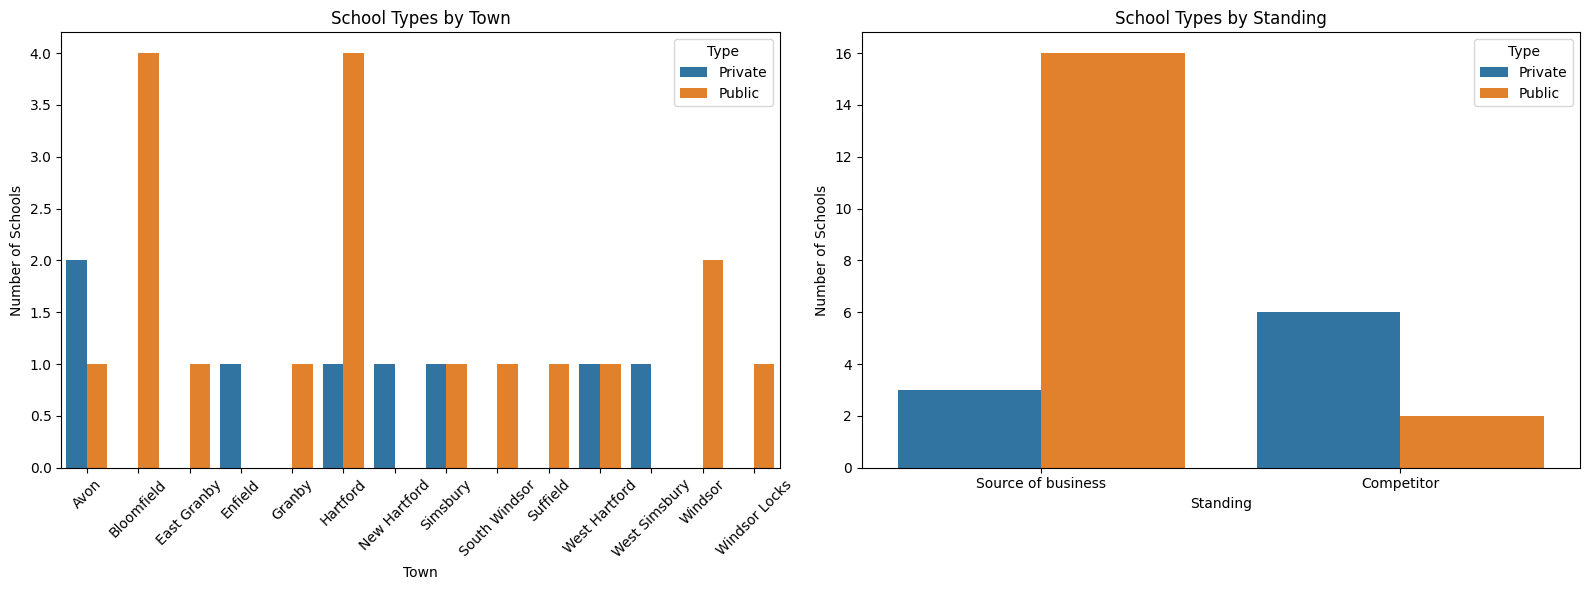

In [2]:
# Combined subplot figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1 – Type by Town
sns.countplot(data=df, x="Town", hue="Type", order=sorted(df["Town"].dropna().unique()), ax=axes[0])
axes[0].set_title("School Types by Town")
axes[0].set_ylabel("Number of Schools")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2 – Type by Standing
sns.countplot(data=df, x="Standing", hue="Type", order=["Source of business", "Competitor"], ax=axes[1])
axes[1].set_title("School Types by Standing")
axes[1].set_ylabel("Number of Schools")

plt.tight_layout()
plt.show()

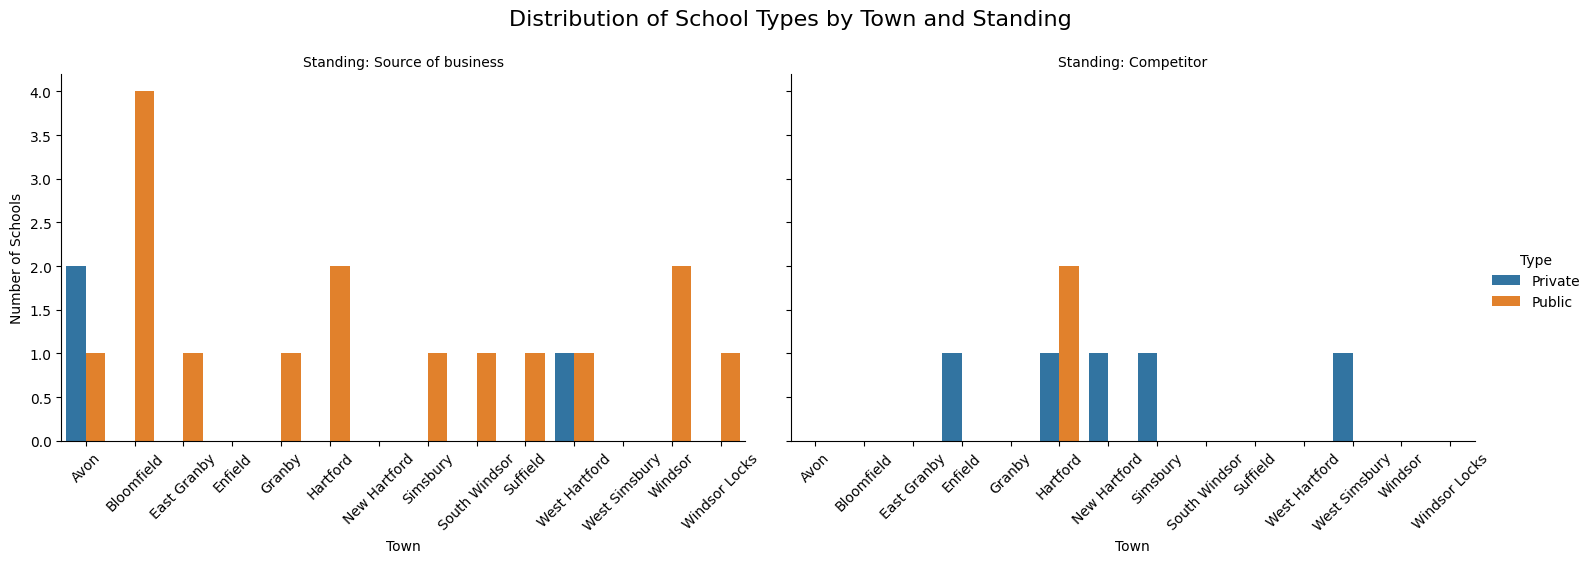

In [3]:
# Single plot with faceting: one subplot per Standing category
g = sns.catplot(
    data=df,
    kind="count",
    x="Town",
    hue="Type",
    col="Standing",
    col_order=["Source of business", "Competitor"],
    order=sorted(df["Town"].dropna().unique()),
    height=5,
    aspect=1.5
)

g.set_titles("Standing: {col_name}")
g.set_xticklabels(rotation=45)
g.set_axis_labels("Town", "Number of Schools")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Distribution of School Types by Town and Standing", fontsize=16)

plt.show()

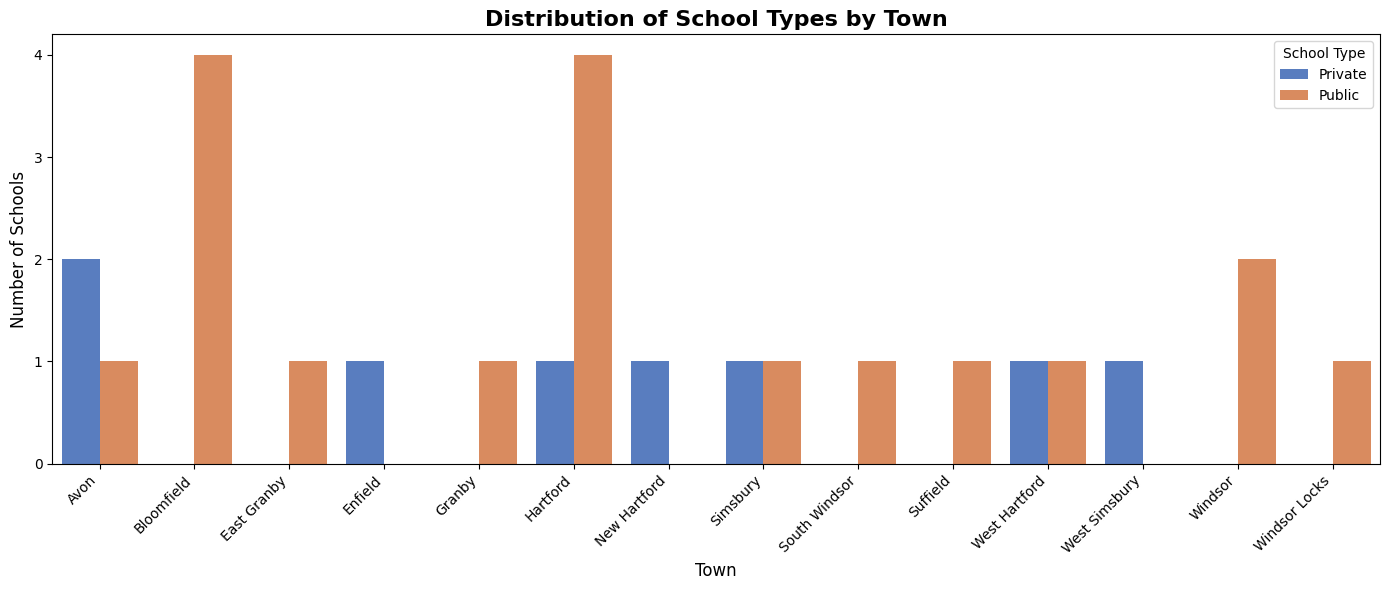

In [4]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(14, 6))
sns.countplot(
    data=df,
    x="Town",
    hue="Type",
    order=sorted(df["Town"].dropna().unique()),
    palette="muted"
)

plt.title("Distribution of School Types by Town", fontsize=16, weight='bold')
plt.xlabel("Town", fontsize=12)
plt.ylabel("Number of Schools", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # <- force integer ticks
plt.legend(title="School Type")
plt.tight_layout()
plt.show()


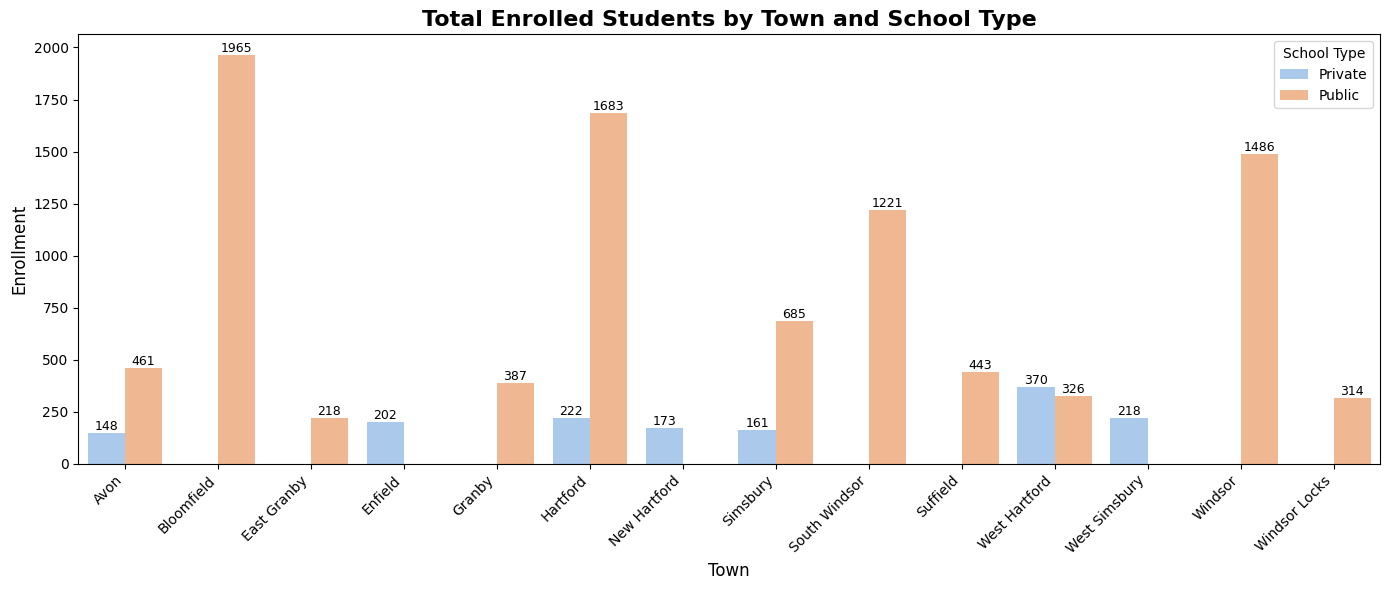

In [5]:
# Group by town and type, summing enrollment
grouped = df.groupby(['Town', 'Type'], dropna=False)['Enrollment'].sum().reset_index()

# Drop rows where enrollment is missing (to avoid NaN bars)
grouped = grouped.dropna(subset=['Enrollment'])

# Plot
plt.figure(figsize=(14, 6))
barplot = sns.barplot(
    data=grouped,
    x="Town",
    y="Enrollment",
    hue="Type",
    palette="pastel",
    order=sorted(df["Town"].dropna().unique())
)

# Annotate each bar with enrollment value
for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        barplot.annotate(f'{int(height)}',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=9)

plt.title("Total Enrolled Students by Town and School Type", fontsize=16, weight='bold')
plt.xlabel("Town", fontsize=12)
plt.ylabel("Enrollment", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(title="School Type")
plt.tight_layout()
plt.show()


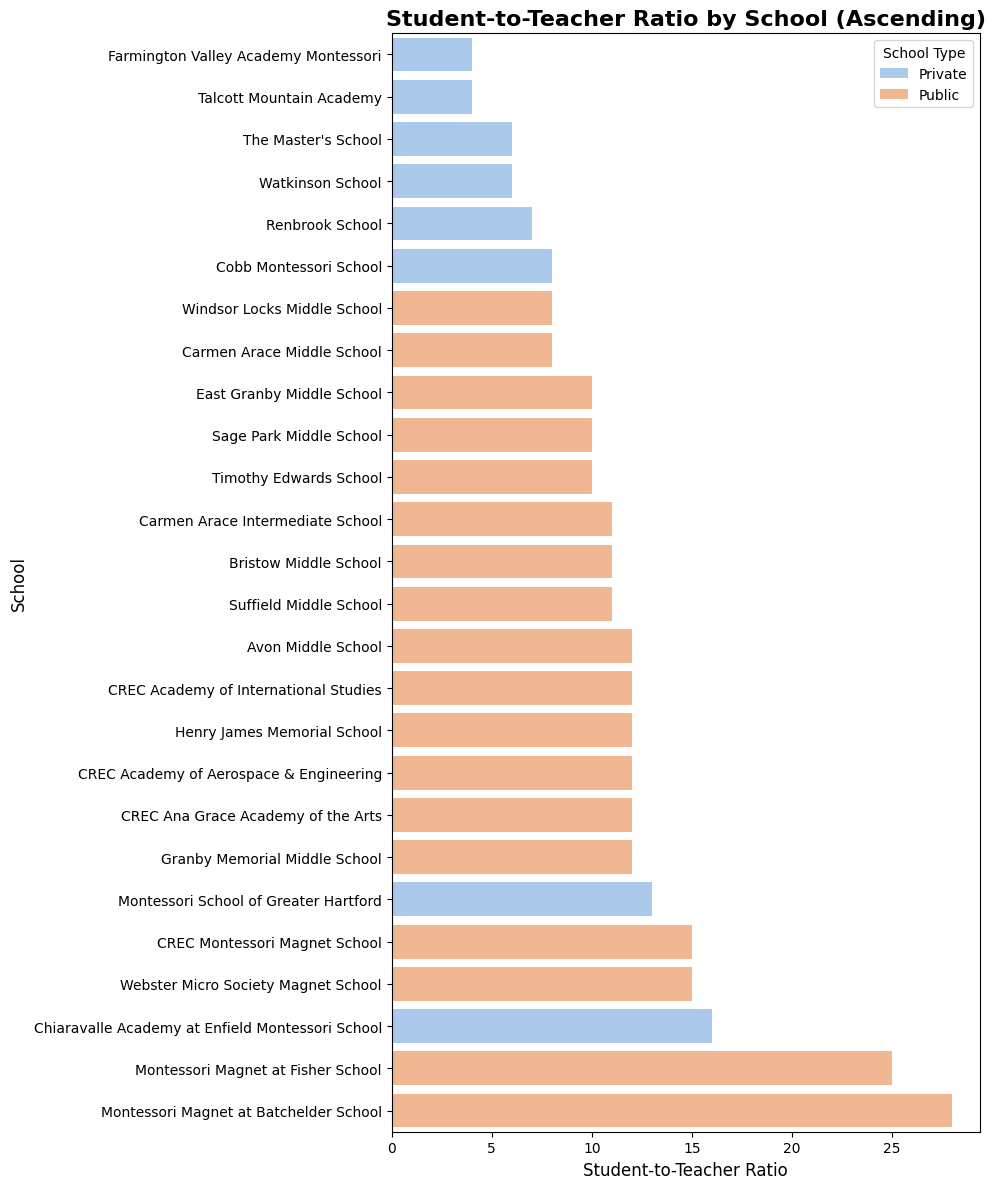

In [6]:
# Convert "Ratio" (e.g., "12:1") to numeric
df["Ratio_num"] = df["Ratio"].str.extract(r'(\d+)').astype(float)

# Drop rows with missing ratio
ratio_df = df.dropna(subset=["Ratio_num"])

# Sort by ratio ascending
ratio_df = ratio_df.sort_values("Ratio_num")

# Plot
plt.figure(figsize=(10, 12))
sns.barplot(
    data=ratio_df,
    x="Ratio_num",
    y="School",
    hue="Type",
    palette="pastel"
)

plt.title("Student-to-Teacher Ratio by School (Ascending)", fontsize=16, weight='bold')
plt.xlabel("Student-to-Teacher Ratio", fontsize=12)
plt.ylabel("School", fontsize=12)
plt.legend(title="School Type")
plt.tight_layout()
plt.show()


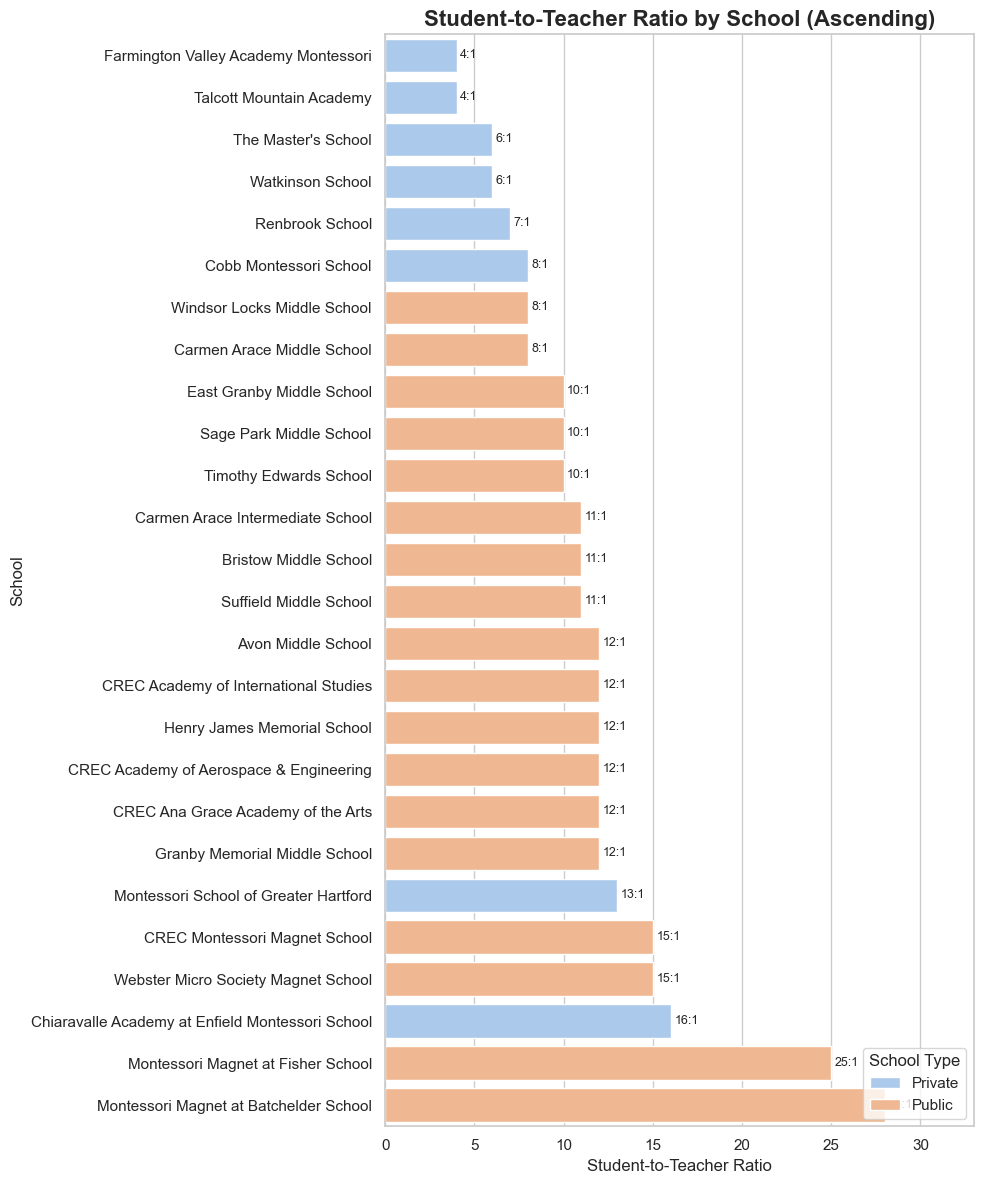

In [7]:
# Convert "Ratio" to numeric if not already done
df["Ratio_num"] = df["Ratio"].str.extract(r'(\d+)').astype(float)

# Clean and sort
ratio_df = df.dropna(subset=["Ratio_num"]).sort_values("Ratio_num", ascending=True)

# Set style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(10, 12))
barplot = sns.barplot(
    data=ratio_df,
    x="Ratio_num",
    y="School",
    hue="Type",
    palette={"Private": "#A1C9F4", "Public": "#FFB482"}
)

# Add annotations to bars
for p in barplot.patches:
    width = p.get_width()
    if width > 0:
        barplot.annotate(f'{int(width)}:1',
                         (width + 0.2, p.get_y() + p.get_height() / 2),
                         ha='left', va='center', fontsize=9)

# Title and labels
plt.title("Student-to-Teacher Ratio by School (Ascending)", fontsize=16, weight='bold')
plt.xlabel("Student-to-Teacher Ratio", fontsize=12)
plt.ylabel("School", fontsize=12)
plt.legend(title="School Type", loc="lower right")
plt.xlim(0, ratio_df["Ratio_num"].max() + 5)
plt.tight_layout()
plt.show()

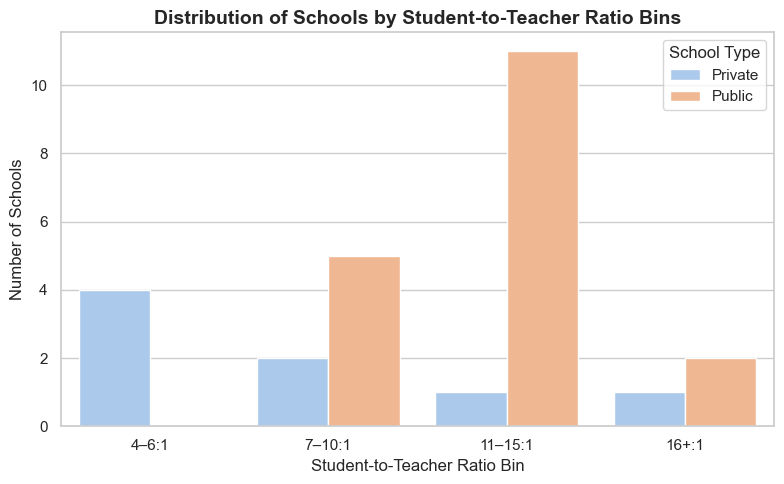

In [8]:
# Create bins for student-to-teacher ratio
bins = [0, 6, 10, 15, 100]
labels = ['4–6:1', '7–10:1', '11–15:1', '16+:1']
df['Ratio_bin'] = pd.cut(df['Ratio_num'], bins=bins, labels=labels)
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='Ratio_bin',
    hue='Type',
    palette={"Private": "#A1C9F4", "Public": "#FFB482"}
)

plt.title("Distribution of Schools by Student-to-Teacher Ratio Bins", fontsize=14, weight='bold')
plt.xlabel("Student-to-Teacher Ratio Bin", fontsize=12)
plt.ylabel("Number of Schools", fontsize=12)
plt.legend(title="School Type")
plt.tight_layout()
plt.show()

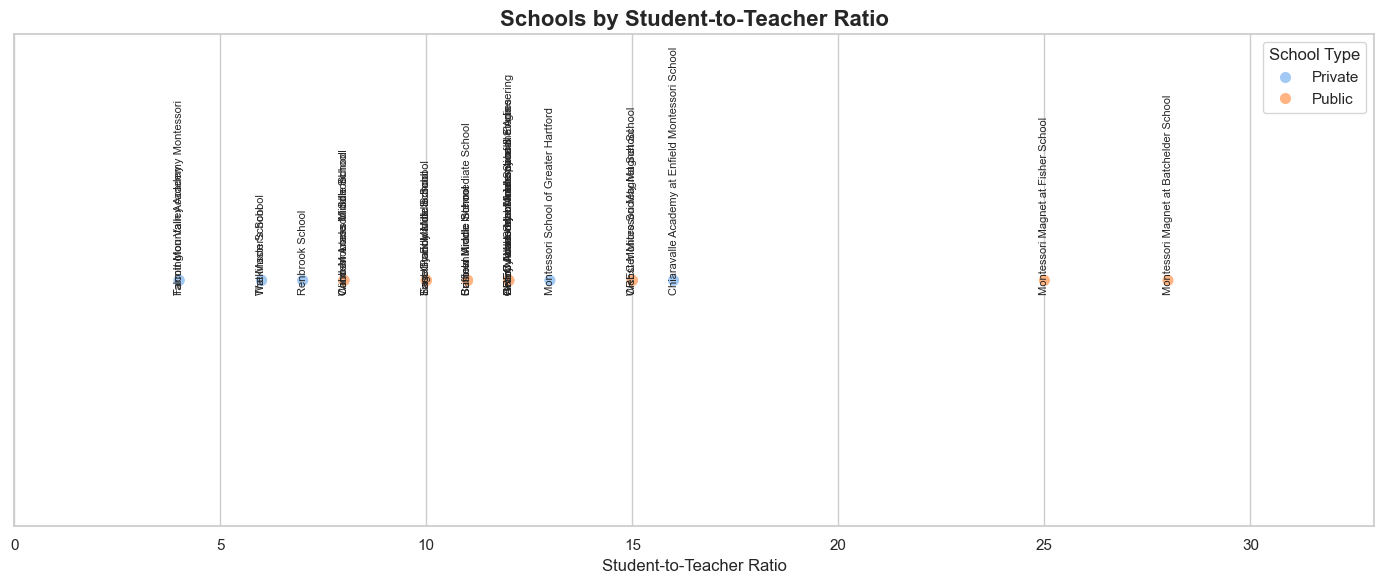

In [9]:
# Clean and sort data
ratio_df = df.dropna(subset=["Ratio_num"]).sort_values("Ratio_num")

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Plot stripplot (dots)
ax = sns.stripplot(
    data=ratio_df,
    x="Ratio_num",
    y=[""] * len(ratio_df),
    hue="Type",
    palette={"Private": "#A1C9F4", "Public": "#FFB482"},
    size=8,
    jitter=0
)

# Add school names vertically above the dots
for i, row in ratio_df.iterrows():
    ax.text(
        row["Ratio_num"],
        0.03,  # Y offset for spacing
        row["School"],
        rotation=90,
        fontsize=8,
        ha='center',
        va='bottom'
    )

# Customize plot
plt.title("Schools by Student-to-Teacher Ratio", fontsize=16, weight='bold')
plt.xlabel("Student-to-Teacher Ratio", fontsize=12)
plt.yticks([])  # Remove y-axis
plt.xlim(0, ratio_df["Ratio_num"].max() + 5)
plt.legend(title="School Type", loc="upper right")
plt.tight_layout()
plt.show()

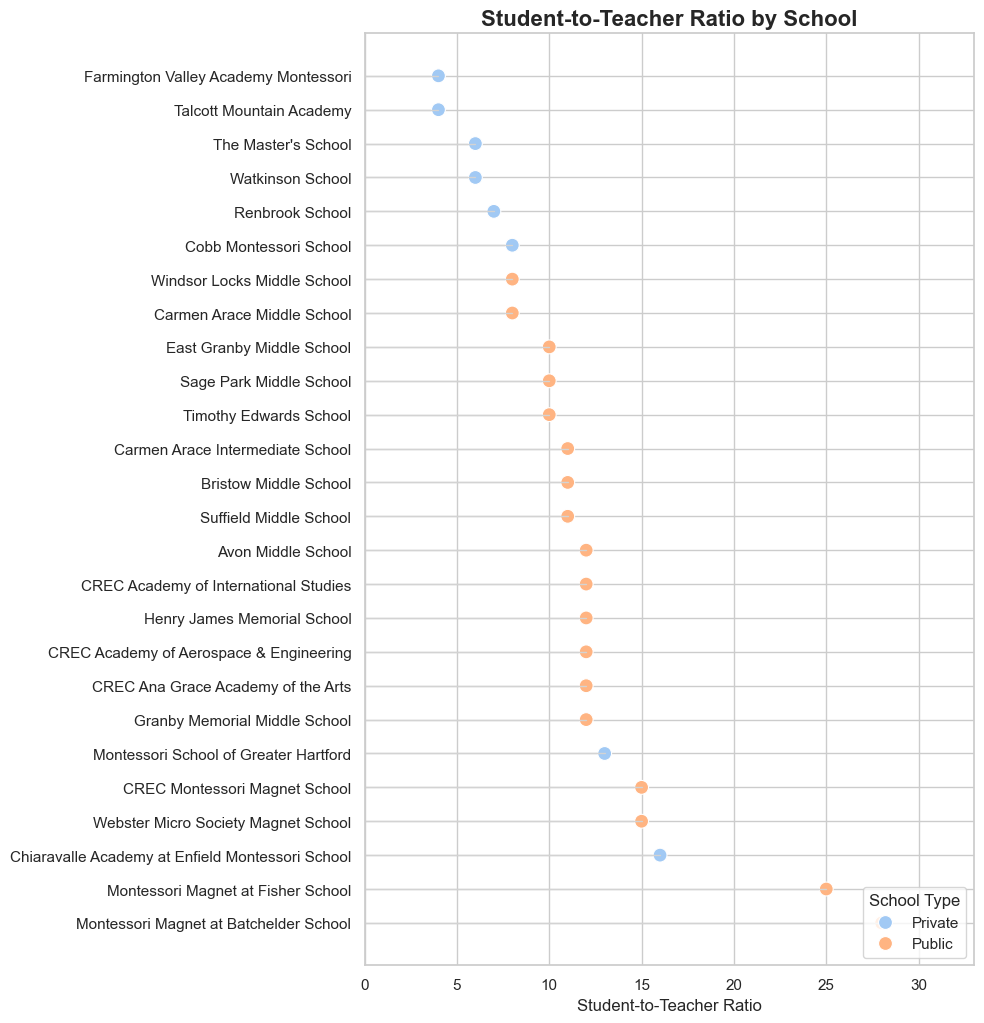

In [10]:
# Prepare data
ratio_df = df.dropna(subset=["Ratio_num"]).sort_values("Ratio_num")

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, len(ratio_df) * 0.4))

# Plot lines from 0 to ratio
for i, row in ratio_df.iterrows():
    plt.plot([0, row["Ratio_num"]], [row["School"], row["School"]], color="lightgray", linewidth=1)

# Plot points
sns.scatterplot(
    data=ratio_df,
    x="Ratio_num",
    y="School",
    hue="Type",
    palette={"Private": "#A1C9F4", "Public": "#FFB482"},
    s=100,
    legend="full"
)

# Final touches
plt.title("Student-to-Teacher Ratio by School", fontsize=16, weight='bold')
plt.xlabel("Student-to-Teacher Ratio")
plt.ylabel("")
plt.xlim(0, ratio_df["Ratio_num"].max() + 5)
plt.xticks(range(0, int(ratio_df["Ratio_num"].max()) + 6, 5))
plt.legend(title="School Type", loc="lower right")
plt.tight_layout()
plt.show()

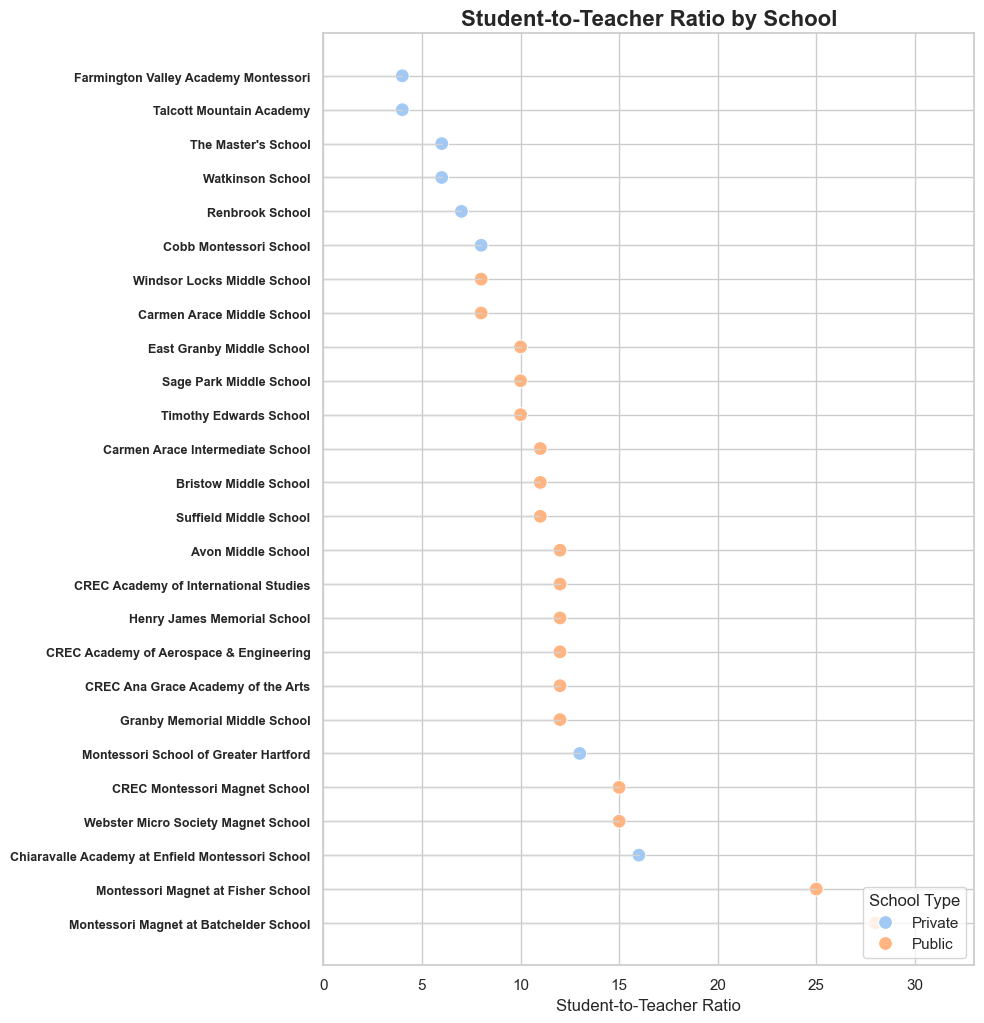

In [11]:
# Prepare data
ratio_df = df.dropna(subset=["Ratio_num"]).sort_values("Ratio_num")

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, len(ratio_df) * 0.4))

# Plot lines from 0 to ratio
for i, row in ratio_df.iterrows():
    plt.plot([0, row["Ratio_num"]], [row["School"], row["School"]], color="lightgray", linewidth=1)

# Plot dots
sns.scatterplot(
    data=ratio_df,
    x="Ratio_num",
    y="School",
    hue="Type",
    palette={"Private": "#A1C9F4", "Public": "#FFB482"},
    s=100,
    legend="full"
)

# Title and axis labels
plt.title("Student-to-Teacher Ratio by School", fontsize=16, weight='bold')
plt.xlabel("Student-to-Teacher Ratio")
plt.ylabel("")

# Bold school names
plt.yticks(fontsize=9, fontweight='bold')

# Final tweaks
plt.xlim(0, ratio_df["Ratio_num"].max() + 5)
plt.xticks(range(0, int(ratio_df["Ratio_num"].max()) + 6, 5))
plt.legend(title="School Type", loc="lower right")
plt.tight_layout()
plt.show()

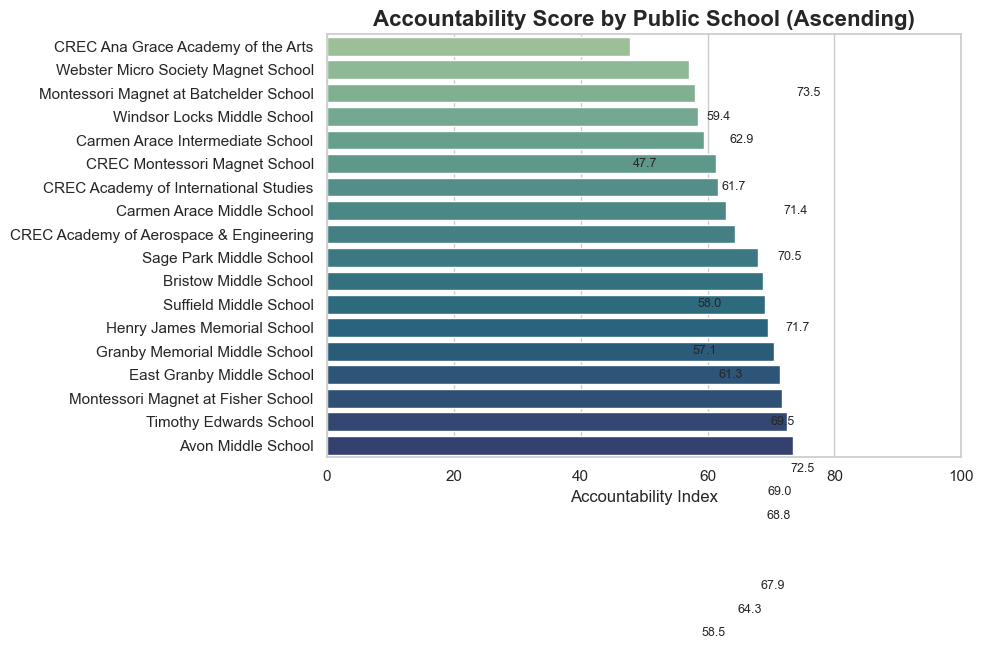

In [12]:

# Filter only public schools with accountability scores
public_df = df[(df["Type"] == "Public") & (df["Accountability"].notna())]
public_df = public_df.sort_values("Accountability")

# Plot
plt.figure(figsize=(10, len(public_df) * 0.4))
sns.set(style="whitegrid")

barplot = sns.barplot(
    data=public_df,
    x="Accountability",
    y="School",
    palette="crest"
)

# Annotate scores on bars
for i, row in public_df.iterrows():
    plt.text(row["Accountability"] + 0.5, i, f"{row['Accountability']:.1f}", va='center', fontsize=9)

# Customize plot
plt.title("Accountability Score by Public School (Ascending)", fontsize=16, weight='bold')
plt.xlabel("Accountability Index")
plt.ylabel("")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

(0.0, 100.0)

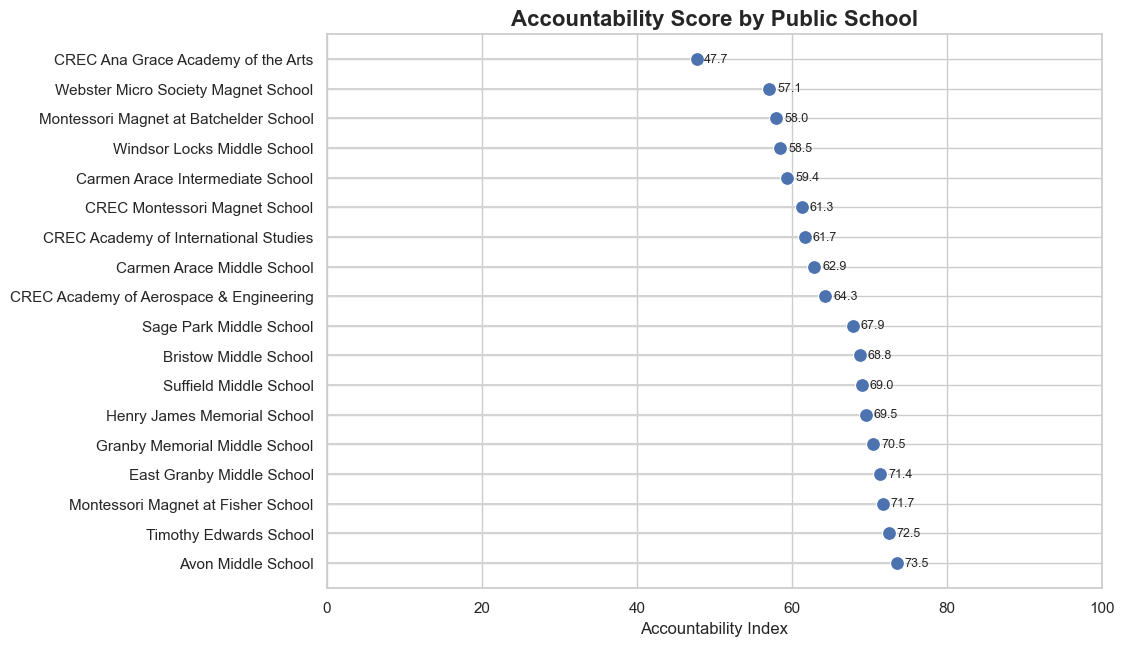

In [14]:
# Filter public schools with accountability scores
public_df = df[(df["Type"] == "Public") & (df["Accountability"].notna())].copy()
public_df = public_df.sort_values("Accountability")

# Set up plot
plt.figure(figsize=(10, len(public_df) * 0.4))
sns.set(style="whitegrid")

# Plot lollipop stems
for i, row in public_df.iterrows():
    plt.plot([0, row["Accountability"]], [row["School"], row["School"]], color="lightgray", linewidth=1.5)

# Plot dots
sns.scatterplot(
    data=public_df,
    x="Accountability",
    y="School",
    color="#4C72B0",
    s=100,
    zorder=3
)

# Add value labels next to the dots
for i, row in public_df.iterrows():
    plt.text(row["Accountability"] + 1, row["School"], f"{row['Accountability']:.1f}",
             va='center', fontsize=9)

# Final touches
plt.title("Accountability Score by Public School", fontsize=16, weight='bold')
plt.xlabel("Accountability Index")
plt.ylabel("")
plt.xlim(0, 100)
#plt.xtic

In [15]:
df.loc[df["Type"] == "Private", "Tuition"].unique()

array([20500., 28400., 12150., 48700., 17350., 23600., 41175., 24810.,
       20000.])

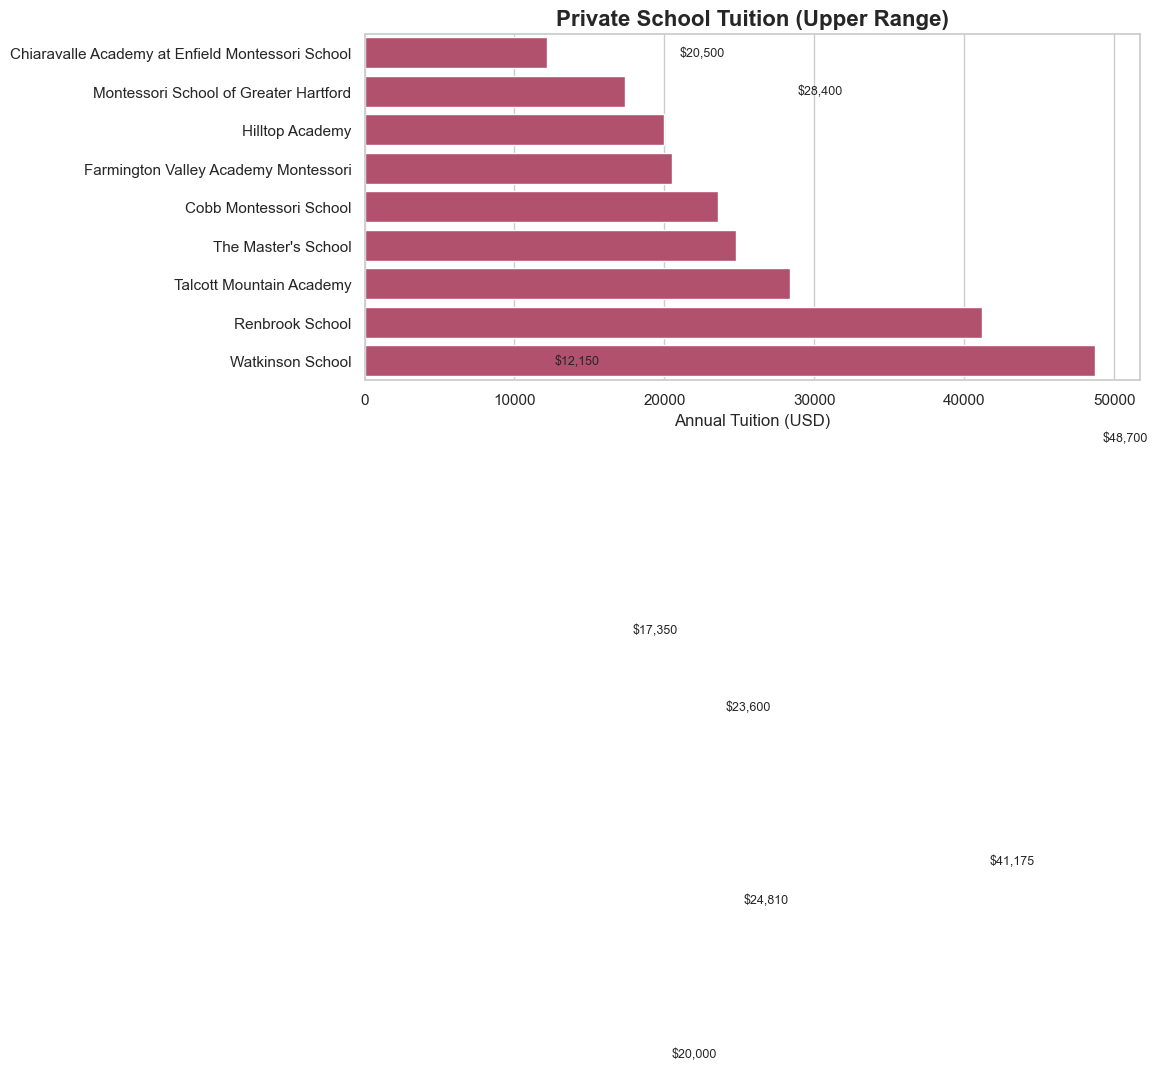

In [16]:
# Filter for private schools with tuition data
private_df = df[(df["Type"] == "Private") & (df["Tuition"].notna())].copy()
private_df = private_df.sort_values("Tuition", ascending=True)

# Plot
plt.figure(figsize=(10, len(private_df) * 0.5))
sns.set(style="whitegrid")

sns.barplot(
    data=private_df,
    x="Tuition",
    y="School",
    hue="Type",
    palette="flare",
    dodge=False,
    legend=False
)

# Add tuition labels
for i, row in private_df.iterrows():
    plt.text(row["Tuition"] + 500, i, f"${int(row['Tuition']):,}", va='center', fontsize=9)

# Formatting
plt.title("Private School Tuition (Upper Range)", fontsize=16, weight='bold')
plt.xlabel("Annual Tuition (USD)")
plt.ylabel("")
plt.xlim(0, private_df["Tuition"].max() + 3000)
plt.tight_layout()
plt.show()

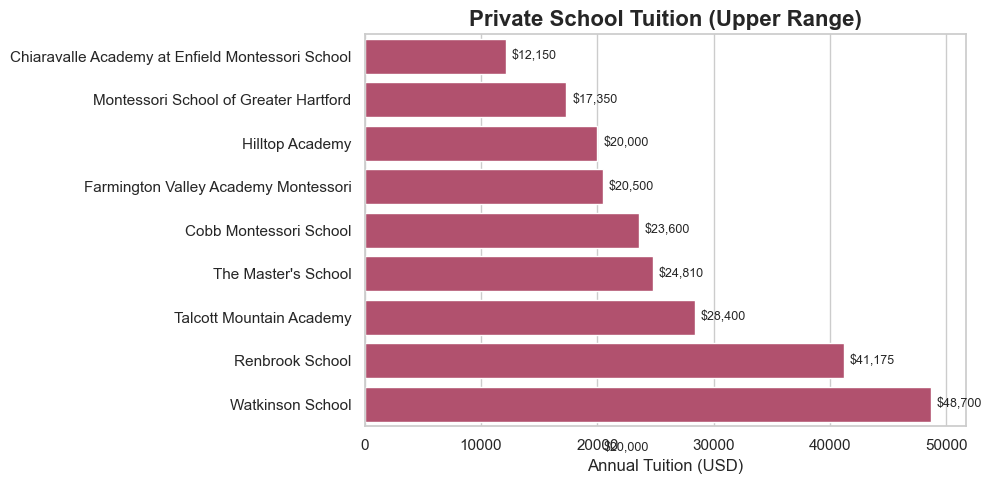

In [17]:
# Manually create Hilltop Academy row
hilltop_row = pd.DataFrame([{
    "School": "Hilltop Academy",
    "Type": "Private",
    "Tuition": 20000
}])

# Concatenate to existing DataFrame
private_df = pd.concat([private_df, hilltop_row], ignore_index=True)
private_df = private_df.sort_values("Tuition", ascending=True)

# Replot
plt.figure(figsize=(10, len(private_df) * 0.5))
sns.set(style="whitegrid")

sns.barplot(
    data=private_df,
    x="Tuition",
    y="School",
    hue="Type",
    palette="flare",
    dodge=False,
    legend=False
)

# Add tuition labels
for i, row in private_df.iterrows():
    plt.text(row["Tuition"] + 500, i, f"${int(row['Tuition']):,}", va='center', fontsize=9)

# Formatting
plt.title("Private School Tuition (Upper Range)", fontsize=16, weight='bold')
plt.xlabel("Annual Tuition (USD)")
plt.ylabel("")
plt.xlim(0, private_df["Tuition"].max() + 3000)
plt.tight_layout()
plt.show()

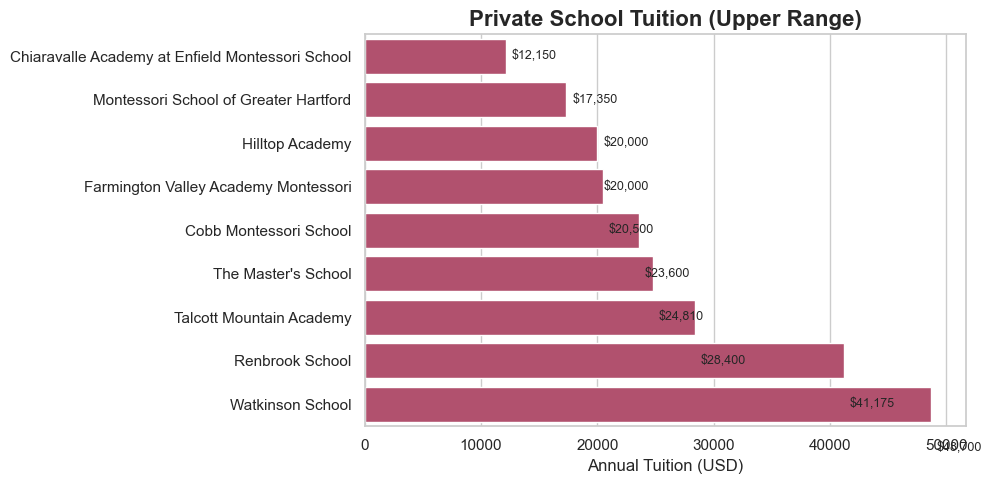

In [18]:
# Fix Watkinson School's tuition
private_df.loc[private_df["School"] == "Watkinson School", "Tuition"] = 48700
private_df.loc[private_df["School"] == "Chiaravalle Academy at Enfield Montessori", "Tuition"]= 12150

# Sort and reset index
private_df = private_df.sort_values("Tuition", ascending=True).reset_index(drop=True)

# Plot
plt.figure(figsize=(10, len(private_df) * 0.5))
sns.set(style="whitegrid")

sns.barplot(
    data=private_df,
    x="Tuition",
    y="School",
    hue="Type",
    palette="flare",
    dodge=False,
    legend=False
)

# Add correct labels now that the index matches plot positions
for i, row in private_df.iterrows():
    plt.text(row["Tuition"] + 500, i, f"${int(row['Tuition']):,}", va='center', fontsize=9)

# Formatting
plt.title("Private School Tuition (Upper Range)", fontsize=16, weight='bold')
plt.xlabel("Annual Tuition (USD)")
plt.ylabel("")
plt.xlim(0, private_df["Tuition"].max() + 3000)
plt.tight_layout()
plt.show()


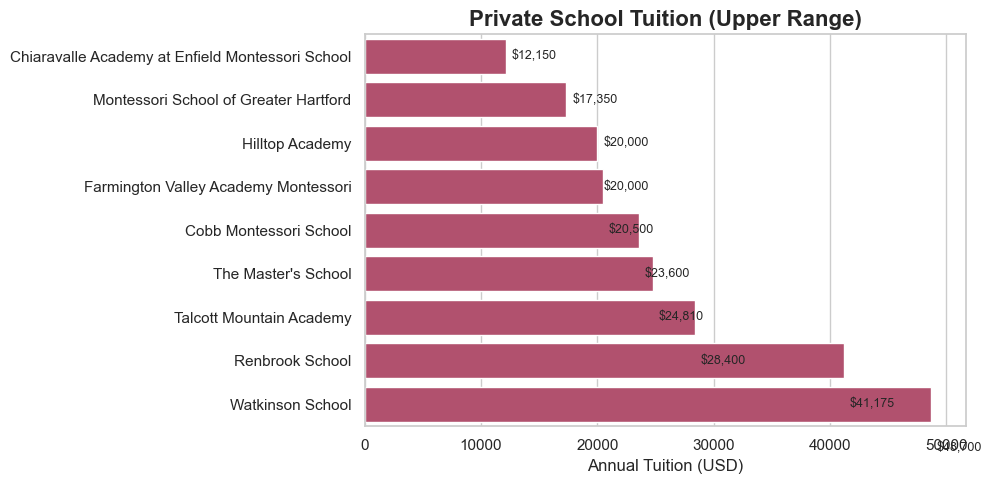

In [19]:
# Fix tuition values
private_df.loc[private_df["School"] == "Watkinson School", "Tuition"] = 48700

# Fix potential naming inconsistency for Chiaravalle
private_df["School"] = private_df["School"].str.strip()
private_df.loc[private_df["School"].str.contains("Chiaravalle", case=False), "Tuition"] = 12150

# Sort and reset index
private_df = private_df.sort_values("Tuition", ascending=True).reset_index(drop=True)

# Plot
plt.figure(figsize=(10, len(private_df) * 0.5))
sns.set(style="whitegrid")

sns.barplot(
    data=private_df,
    x="Tuition",
    y="School",
    hue="Type",
    palette="flare",
    dodge=False,
    legend=False
)

# Add tuition value labels
for i, row in private_df.iterrows():
    plt.text(row["Tuition"] + 500, i, f"${int(row['Tuition']):,}", va='center', fontsize=9)

# Formatting
plt.title("Private School Tuition (Upper Range)", fontsize=16, weight='bold')
plt.xlabel("Annual Tuition (USD)")
plt.ylabel("")
plt.xlim(0, private_df["Tuition"].max() + 3000)
plt.tight_layout()
plt.show()

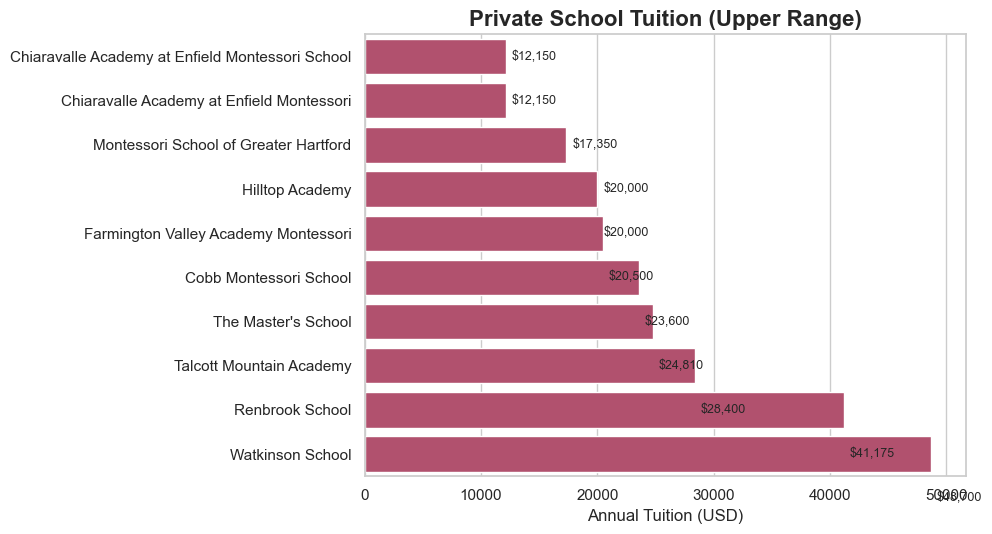

In [20]:
# Add or update Watkinson School tuition
if "Watkinson School" in private_df["School"].values:
    private_df.loc[private_df["School"] == "Watkinson School", "Tuition"] = 48700
else:
    private_df = pd.concat([
        private_df,
        pd.DataFrame([{
            "School": "Watkinson School",
            "Tuition": 48700,
            "Type": "Private"  # Replace with correct type if needed
        }])
    ], ignore_index=True)

# Add or update Chiaravalle Academy at Enfield Montessori tuition
if "Chiaravalle Academy at Enfield Montessori" in private_df["School"].values:
    private_df.loc[private_df["School"] == "Chiaravalle Academy at Enfield Montessori", "Tuition"] = 12150
else:
    private_df = pd.concat([
        private_df,
        pd.DataFrame([{
            "School": "Chiaravalle Academy at Enfield Montessori",
            "Tuition": 12150,
            "Type": "Private"  # Replace with correct type if needed
        }])
    ], ignore_index=True)

# Sort and reset index
private_df = private_df.sort_values("Tuition", ascending=True).reset_index(drop=True)

# Plot
plt.figure(figsize=(10, len(private_df) * 0.5))
sns.set(style="whitegrid")

sns.barplot(
    data=private_df,
    x="Tuition",
    y="School",
    hue="Type",
    palette="flare",
    dodge=False,
    legend=False
)

# Add tuition value labels
for i, row in private_df.iterrows():
    plt.text(row["Tuition"] + 500, i, f"${int(row['Tuition']):,}", va='center', fontsize=9)

# Formatting
plt.title("Private School Tuition (Upper Range)", fontsize=16, weight='bold')
plt.xlabel("Annual Tuition (USD)")
plt.ylabel("")
plt.xlim(0, private_df["Tuition"].max() + 3000)
plt.tight_layout()
plt.show()

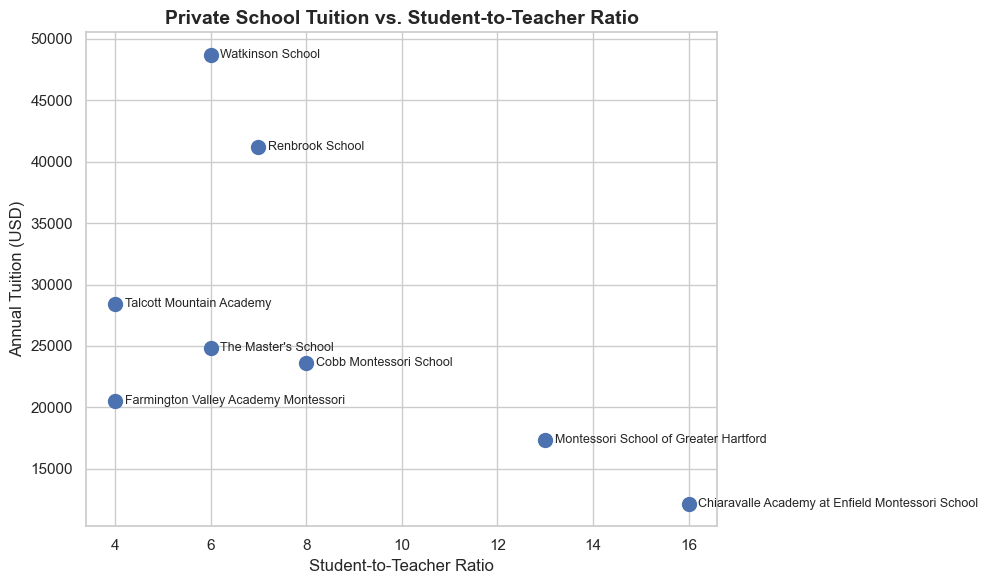

In [22]:
# Data for the schools
data = {
    "School": [
        "Farmington Valley Academy Montessori",
        "Talcott Mountain Academy",
        "Chiaravalle Academy at Enfield Montessori School",
        "Watkinson School",
        "Montessori School of Greater Hartford",
        "Cobb Montessori School",
        "Renbrook School",
        "The Master's School"
    ],
    "Tuition": [20500, 28400, 12150, 48700, 17350, 23600, 41175, 24810],
    "Ratio": [4, 4,16, 6, 13, 8, 7, 6]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df["Ratio"], df["Tuition"], s=100)

# Add labels
for i, row in df.iterrows():
    plt.text(row["Ratio"] + 0.2, row["Tuition"], row["School"], fontsize=9, verticalalignment='center')

# Formatting
plt.title("Private School Tuition vs. Student-to-Teacher Ratio", fontsize=14, weight='bold')
plt.xlabel("Student-to-Teacher Ratio")
plt.ylabel("Annual Tuition (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()